In [2]:
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/experimental/KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1.estimator.experimental import KMeans
import base64
from PIL import Image
import cv2

In [3]:
# import the training dataset
solana_train = pd.read_csv("../../DL-Photos/solana_train.csv")
solana_train=solana_train['img']
NImages = solana_train.shape[0]

In [5]:
# For only one image
img_data = base64.b64decode(solana_train[0][1:])
img = np.array(Image.open(io.BytesIO(img_data)))
img = cv2.resize(img,(224,224))

In [12]:
# Reshape images and put them in an array
ims = []
#for ii in range(0,NImages):
for ii in range(0,2000): # Reduce the number of images to something that can be handled by the RAM
  img_data = base64.b64decode(solana_train[0][1:])
  img = np.array(Image.open(io.BytesIO(img_data)))
#  img = cv2.resize(img,(224,224))
#  im2 = np.reshape(img,224*224*3)
  img = cv2.resize(img,(150,150))
  im2 = np.reshape(img,150*150*3)
  ims.append(im2)
ims = np.asarray(ims)

In [13]:
# Parameters
num_steps = 10 # Total steps to train
batch_size = 1024 # The number of samples per batch
k = 25 # The number of clusters
num_classes = 10 # The 10 digits
num_features = 150*150*3 # Each image is  224*224*3 pixels

X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])
kmeans = KMeans(num_clusters=k, distance_metric='cosine',use_mini_batch=True)
#import inspect
#inspect.getargspec(KMeans) # This one is to check the arguments that KMeans take

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp768m_9by', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpchs21lf2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpchs21lf2/model.ckpt-99
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 99...
INFO:tensorflow:Saving checkpoints for 99 into /tmp/tmpchs21lf2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 99...
INFO:tensorflow:loss = 2.701718, step = 100
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 101...
INFO:tensorflow:Saving checkpoints for 101 into /tmp/tmpchs21lf2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 101...
INFO:tensorflow:Loss for final step: 2.701718.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-06-19T10:09:17
INFO:tenso

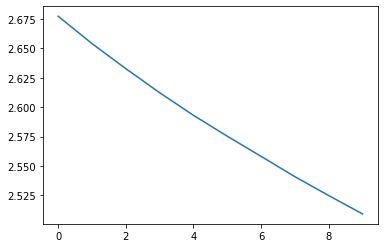

In [19]:
# KMeans with random points

num_points = 100
dimensions = 5
points = np.random.uniform(0, 1000, [num_points, dimensions])
scores = []
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)
# train
num_iterations = 10
previous_centers = None
for _ in range(0,num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
#  if previous_centers is not None:
#    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
#  print('score:', kmeans.score(input_fn))
  scores.append(kmeans.score(input_fn))
print('cluster centers:', cluster_centers)
plt.plot(range(0,num_iterations),scores)



In [11]:
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
###  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpchs21lf2/model.ckpt-59
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
# Now with the actual images
scores = []
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(ims, dtype=tf.float32), num_epochs=1)
#      tf.convert_to_tensor(x, dtype=tf.float32), num_epochs=1) # Use the reduced dimensions
# train
num_iterations = num_steps
previous_centers = None
for _ in range(0,num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
#  if previous_centers is not None:
#    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
#  print('score:', kmeans.score(input_fn))
  scores.append(kmeans.score(input_fn))
print('cluster centers:', cluster_centers)
plt.plot(range(0,num_iterations),scores)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp768m_9by/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp768m_9by/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-06-20T12:28:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp768m_9by/model.ckpt-1
INFO:tensorflow:Running local_i

In [6]:
import sys
sys.path

['/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/mariana/DL/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/mariana/DL/lib/python3.6/site-packages/IPython/extensions',
 '/home/mariana/.ipython']